<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/LS_DS_224_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 25.4MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1
  [seaborn]
You must restart the runtime in order to use newly installed versions.


In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [9]:
# Seeing shapes of all loaded datasets
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [10]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [11]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [12]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [13]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [14]:
# concepts is a data dictionary/meta data
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,http://www.gapminder.org/gapminder-world/docum...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,http://spreadsheets.google.com/pub?key=t4eF8H_...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
# words like help() funtion
#pd.merge?

In [0]:
# Merging income and lifespan dataframes -- no other params needed
df = pd.merge(income, lifespan)

In [16]:
# Looking a df shape compared to income and lifespan -- we gained columns but have fewer rows
income.shape, lifespan.shape, df.shape

((46513, 3), (44370, 3), (40437, 4))

In [0]:
# Merging population dataframe and df
df = pd.merge(df, population)

In [20]:
# Got another column, but number of rows remained the same
df.shape

(40437, 5)

In [18]:
# Quick look at df so far
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [20]:
# Looking at only rows in entities in country column where country is 'afg'
entities[entities.country=='afg']

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia


In [21]:
# Looking at value counts for each region in world_4region 
entities.world_4region.value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [22]:
# Same as above but for world_6region column
entities.world_6region.value_counts()

europe_central_asia         77
sub_saharan_africa          53
america                     53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [23]:
# Defining variable with list of columns we want from entities dataframe
variables = ['country', 'name', 'world_6region']

# Looking at just those columns
entities[variables].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [32]:
# Merge preview without, without making dataframe
# pd.merge(df, entities[variables],
#          how='inner', left_on='geo', right_on='country').head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [0]:
# Merging previous df and entities(with specified columns in variables list)
df = pd.merge(df, entities[variables], 
         how='inner', left_on='geo', right_on='country')


# Then dropping columns we don't want in df
df = df.drop(columns=['geo', 'country'])

# Cleaning up df by renaming columns
df = df.rename(columns={
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
})

In [26]:
# Altogether, we picked up one column and number of rows remained unchanged
df.shape

(40437, 6)

In [27]:
# Looking at bottom of df
df.tail()

,year,income,lifespan,population,country,region
40432,2014,1908,56.99,15411675,Zimbabwe,sub_saharan_africa
40433,2015,1891,58.27,15777451,Zimbabwe,sub_saharan_africa
40434,2016,1860,59.27,16150362,Zimbabwe,sub_saharan_africa
40435,2017,1907,59.80,16529904,Zimbabwe,sub_saharan_africa
40436,2018,1952,60.18,16913261,Zimbabwe,sub_saharan_africa


## Explore data

In [28]:
# Describing numerical data
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [29]:
# Describing non-numerical data
df.describe(exclude=np.number)

,country,region
count,40437,40437
unique,187,6
top,Sweden,europe_central_asia
freq,219,10778


In [30]:
# Looking at all unique values in country column
df.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [32]:
# Creating usa dataframe with condition where all countries must equal 'United States'
usa = df[df.country=='United States']

# With the usa dataframe, showing just the years 1818, 1918, and 2018
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
38046,1818,2258,39.41,9879049,United States,america
38146,1918,9371,47.18,106721812,United States,america
38246,2018,54898,79.14,326766748,United States,america


In [33]:
# Same as above but with China
china = df[df.country=='China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
6854,1818,985,32.00,374161494,China,east_asia_pacific
6954,1918,989,22.13,462444535,China,east_asia_pacific
7054,2018,16018,76.92,1415045928,China,east_asia_pacific


## Plot visualization

In [34]:
# Creating now dataframe with just rows where year eqauls 2018
now = df[df.year==2018]
now.shape

(184, 6)

In [35]:
# random sample of 10 rows from now dataframe
now.sample(10)

,year,income,lifespan,population,country,region
7711,2018,751,62.42,84004989,"Congo, Dem. Rep.",sub_saharan_africa
28610,2018,12723,80.21,32551815,Peru,america
6835,2018,23366,80.66,18197209,Chile,america
26420,2018,949,62.45,22311375,Niger,sub_saharan_africa
36932,2018,11599,77.96,11659174,Tunisia,middle_east_north_africa
27515,2018,2424,71.51,29624035,Nepal,south_asia
5302,2018,16037,76.84,286388,Barbados,america
4207,2018,12052,77.93,3503554,Bosnia and Herzegovina,europe_central_asia
24887,2018,12100,68.69,3121772,Mongolia,east_asia_pacific
29924,2018,9279,74.78,6896908,Paraguay,america


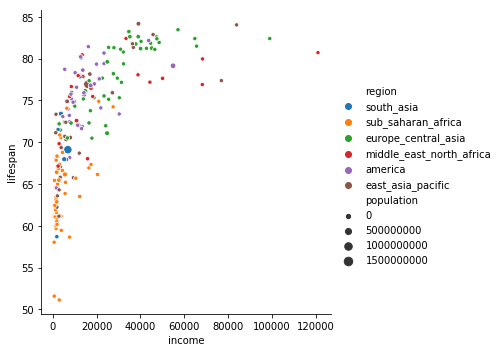

In [36]:
# Seaborn plot of now subset, with hue/color as region and market size for population 
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now);

## Analyze outliers

In [37]:
# Looking at countries that have an income greater than 80,000 in the now subset
now[now.income > 80000].sort_values(by='income')

,year,income,lifespan,population,country,region
31895,2018,83888,84.03,5791901,Singapore,east_asia_pacific
22212,2018,99034,82.39,590321,Luxembourg,europe_central_asia
30362,2018,121033,80.71,2694849,Qatar,middle_east_north_africa


In [0]:
# Isolating the point on the graph that is Qatar
qatar = now[now.country=='Qatar']

# Getting the coordinates for the Qatar point
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

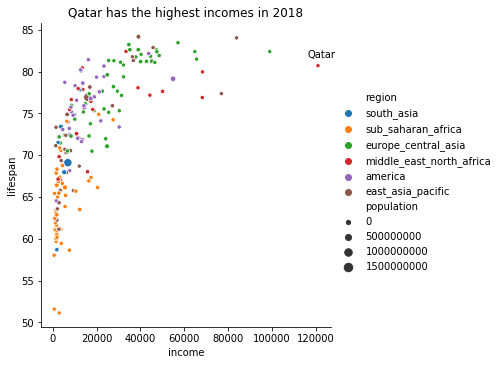

In [39]:
# Same plot as above...
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)

# ...but adding the 'Qatar' label...
plt.text(x=qatar_income-5000, y=qatar_lifespan+1, s='Qatar')

#...and a new title
plt.title('Qatar has the highest incomes in 2018');

## Plot multiple years

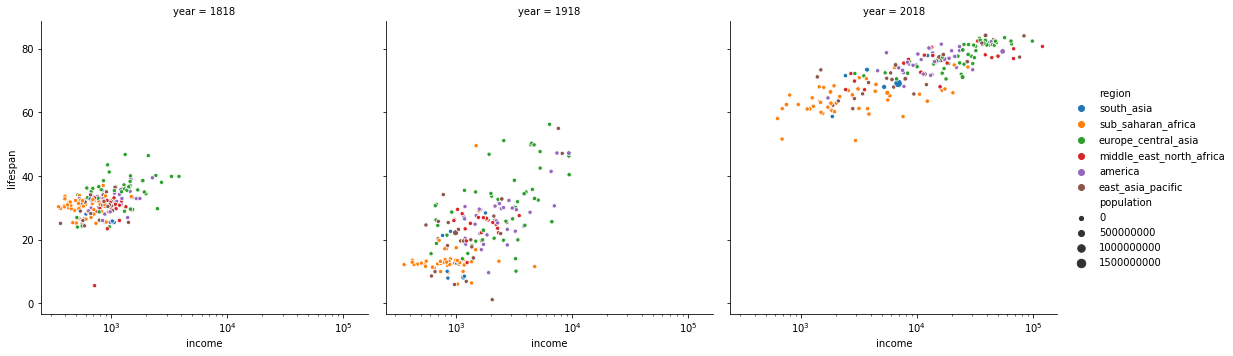

In [40]:
# List with years we want to look at
years = [1818, 1918, 2018]

# Getting the rows with the desired years from the data and putting in a centuries variable
centuries = df[df.year.isin(years)]

# Similar to plot above but with added 'col' parameter
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            col='year', data=centuries)

# Making x-scale log
plt.xscale('log');

## Consistent countries per year?

In [42]:
# With groupby function, we can see that there is an equal number of countries for each year
centuries.groupby('year').country.nunique()

year
1818    184
1918    184
2018    184
Name: country, dtype: int64

## Point out a story

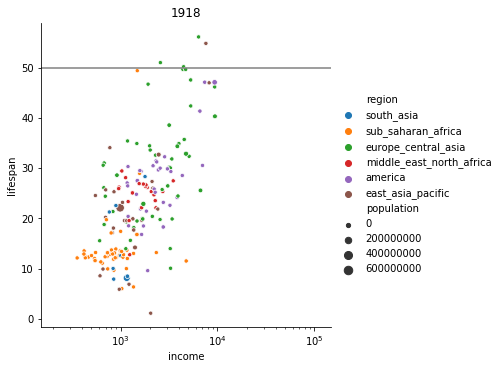

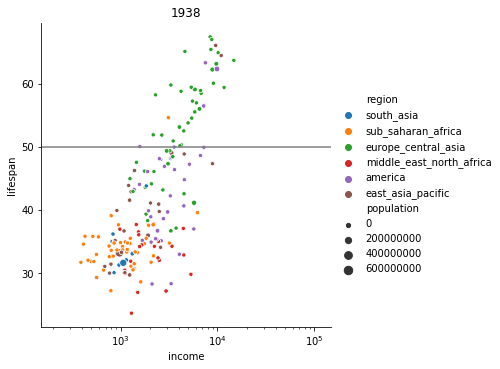

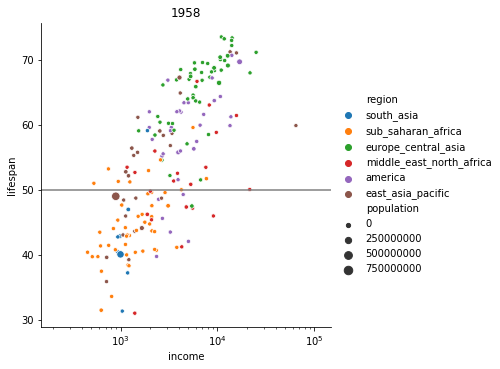

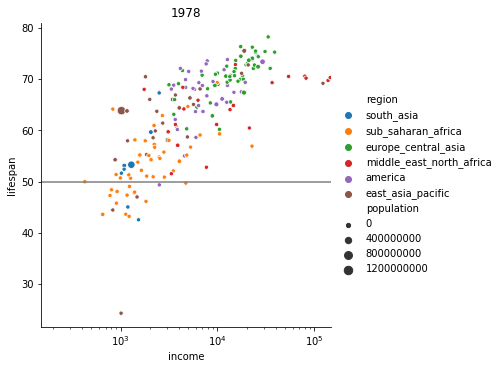

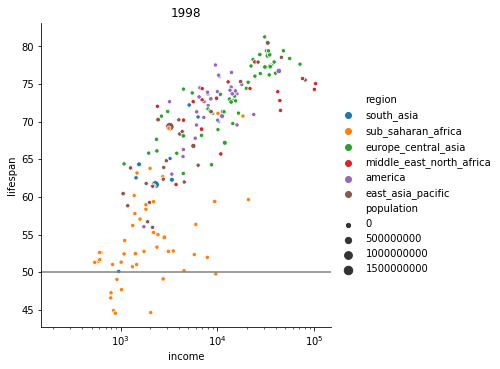

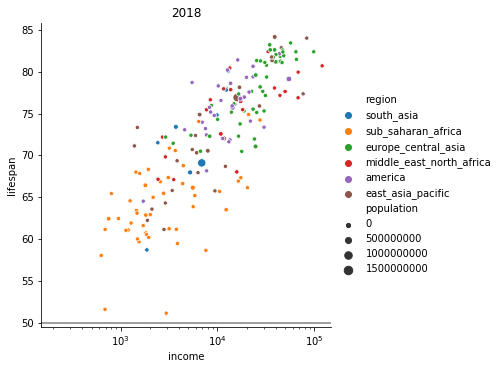

In [46]:
# Adding more years -- increments of 20 years
years = [1918, 1938, 1958, 1978, 1998, 2018]

#subset = df[df.year.isin(years)]

# Doing a for loop to plot graph for every year -- data equals a subset of df
# where the year column equals on the years in the list above
for year in years:
  sns.relplot(x='income', y='lifespan', hue='region', size='population', 
              data=df[df.year==year])

  plt.xscale('log') # x-scale is log
  plt.xlim((150, 150000)) # Setting limit for x-axis
  plt.title(year) # The title for each chart is the year
  # Adding horizontal like at 50 so we can see when/how many countries cross 50-year life expectancy
  plt.axhline(y=50, color='grey');

## 100 years ago, few countries had lifespans above 50 years

In [47]:
# Condition where year must equal 1918 and lifespan must be above 50
df[(df.year==1918) & (df.lifespan > 50)]

,year,income,lifespan,population,country,region
1698,1918,7610,54.95,5066003,Australia,east_asia_pacific
10067,1918,6393,56.24,3165276,Denmark,europe_central_asia
17513,1918,2576,51.11,115504,Iceland,europe_central_asia
27196,1918,4479,50.28,2576646,Norway,europe_central_asia


### Today, no countries have lifespans below 50 years

In [48]:
# Condition where year must equal 2018 and lifespan must be below 50 -- no results
df[(df.year==2018) & (df.lifespan < 50)]

,year,income,lifespan,population,country,region


## Get interactive with Google Colab

In Colab, go to **Insert** > **Add a form field**

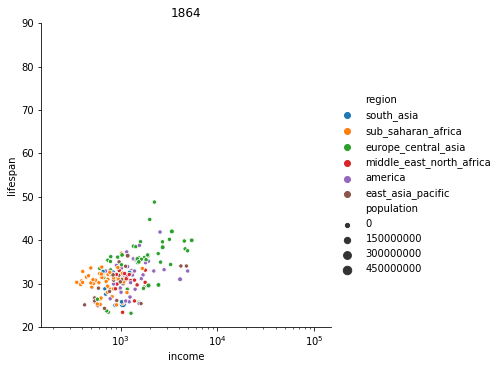

In [51]:
year = 1864 #@param {type:"slider", min:1800, max:2018, step:1}

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            data=df[df.year==year])

plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((20, 90))
plt.title(year);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

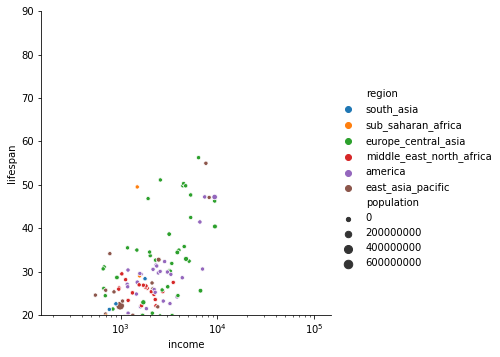

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

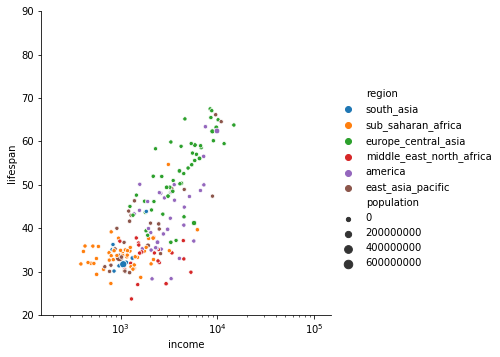

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

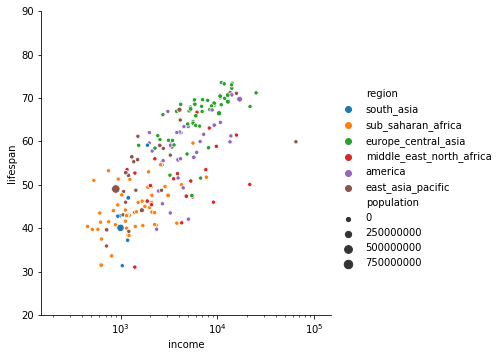

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

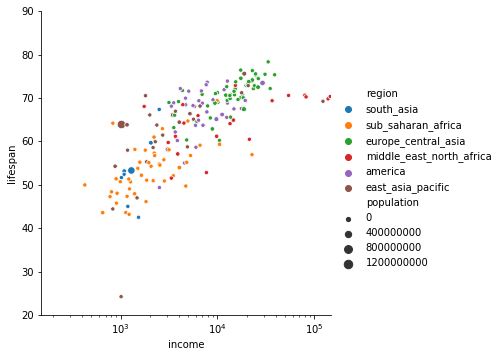

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

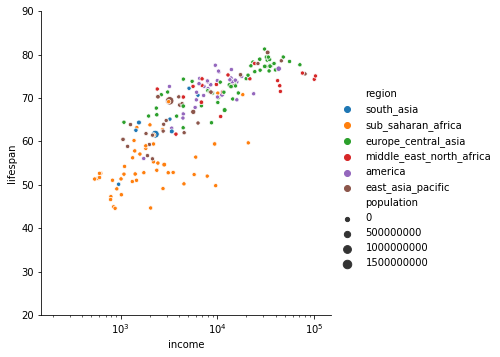

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

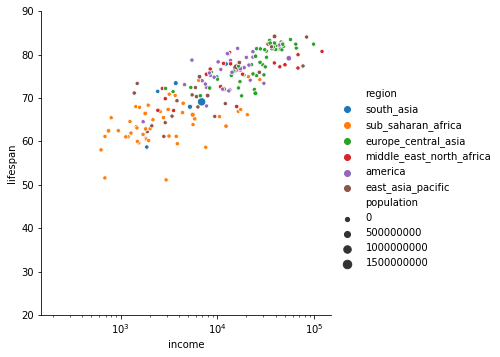

<IPython.core.display.Javascript object>

In [52]:
# Based on the example at: 
# https://colab.research.google.com/notebooks/widgets.ipynb#scrollTo=BZa2t-U5gIAB

from google.colab import widgets
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90));

## STRETCH GOAL: Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)

In [0]:
url = 'https://raw.githubusercontent.com/datasets/s-and-p-500/master/data/data.csv'

In [0]:
sp = pd.read_csv(url)

In [0]:
sp.head()

In [58]:
sp.describe()

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
count,1768.000000,1767.000000,1764.000000,1768.000000,1768.000000,1768.000000,1767.000000,1764.000000,1648.000000
mean,258.374570,5.636486,12.809932,57.726640,4.569559,508.352856,15.159377,29.856173,16.851450
std,514.103382,9.647723,23.854291,70.812597,2.289630,544.306401,8.475205,23.887573,6.735498
min,2.730000,0.180000,0.160000,6.280000,1.500000,67.630000,4.980000,4.190000,4.780000
25%,7.737500,0.410000,0.540000,10.100000,3.290000,170.000000,8.525000,12.647500,11.790000
50%,16.335000,0.830000,1.325000,18.200000,3.860000,253.065000,12.720000,20.445000,16.170000
75%,122.525000,6.370000,13.607500,90.850000,5.222500,610.942500,19.260000,39.320000,20.462500
max,2789.800000,50.000000,109.880000,249.840000,15.320000,2811.960000,50.060000,111.360000,44.200000


In [59]:
sp.shape

(1768, 10)

In [60]:
sp['Dividend'].isnull().sum()

1

In [57]:
type(sp.loc[0, 'Date'])

str

In [0]:
sp['Date'] = pd.to_datetime(sp['Date'], infer_datetime_format=True)

In [76]:
type(sp.loc[0, 'Date'])

pandas._libs.tslib.Timestamp

In [74]:
sp.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


In [63]:
sp.describe()

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
count,1768.000000,1767.000000,1764.000000,1768.000000,1768.000000,1768.000000,1767.000000,1764.000000,1648.000000
mean,258.374570,5.636486,12.809932,57.726640,4.569559,508.352856,15.159377,29.856173,16.851450
std,514.103382,9.647723,23.854291,70.812597,2.289630,544.306401,8.475205,23.887573,6.735498
min,2.730000,0.180000,0.160000,6.280000,1.500000,67.630000,4.980000,4.190000,4.780000
25%,7.737500,0.410000,0.540000,10.100000,3.290000,170.000000,8.525000,12.647500,11.790000
50%,16.335000,0.830000,1.325000,18.200000,3.860000,253.065000,12.720000,20.445000,16.170000
75%,122.525000,6.370000,13.607500,90.850000,5.222500,610.942500,19.260000,39.320000,20.462500
max,2789.800000,50.000000,109.880000,249.840000,15.320000,2811.960000,50.060000,111.360000,44.200000


In [0]:
sp = sp.set_index('Date')

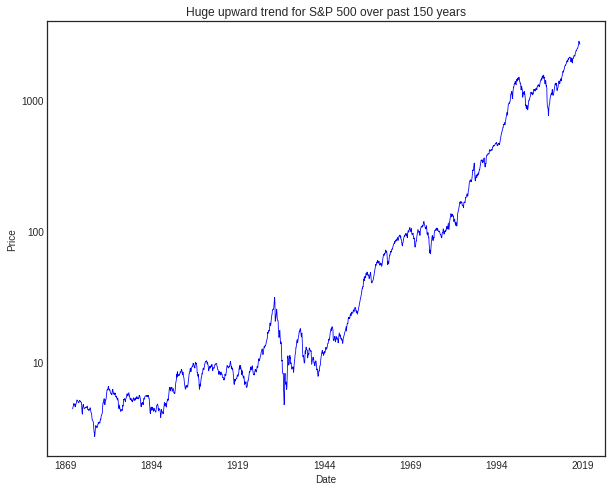

In [85]:
import matplotlib.ticker
plt.style.use('seaborn-white')
ax = sp['SP500'].plot.line(color='b', linewidth=.8, logy=True, figsize=(10, 8))

ax.set(title="Huge upward trend for S&P 500 over past 150 years")

ax.set(xlabel='Date', ylabel='Price')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax;

### Recreating heroin od animated chart -- will try to apply to stock chart above

In [0]:
import seaborn as sns
import matplotlib
import matplotlib.animation as animation

In [0]:
overdoses = pd.read_excel('overdose_data_1999-2015.xls',sheet_name='Online',skiprows =6)
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [109]:
overdoses.head(30)

,Unnamed: 0,Unnamed: 1,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,Total Overdose Deaths,16849.0,17415.0,19394.0,23518.0,25785.0,27424.0,29813.0,34425.0,36010.0,36450.0,37004.0,38329.0,41340.0,41502.0,43982.0,47055.0,52404.0
1,NaN,Female,5591.0,5852.0,6736.0,8490.0,9386.0,10304.0,11089.0,12532.0,13712.0,13982.0,14411.0,15323.0,16352.0,16390.0,17183.0,18243.0,19447.0
2,NaN,Male,11258.0,11563.0,12658.0,15028.0,16399.0,17120.0,18724.0,21893.0,22298.0,22468.0,22593.0,23006.0,24988.0,25112.0,26799.0,28812.0,32957.0
3,NaN,Prescription Drugs1,7523.0,7885.0,9197.0,11529.0,12640.0,14153.0,15352.0,18559.0,19601.0,20044.0,20848.0,22134.0,22810.0,22114.0,22767.0,25760.0,29728.0
4,NaN,Female,3011.0,3196.0,3790.0,4765.0,5191.0,5980.0,6351.0,7553.0,8251.0,8275.0,8740.0,9292.0,9771.0,9632.0,10019.0,11181.0,12218.0
5,NaN,Male,4512.0,4689.0,5407.0,6764.0,7449.0,8173.0,9001.0,11006.0,11350.0,11769.0,12108.0,12842.0,13039.0,12482.0,12748.0,14579.0,17510.0
6,NaN,Opioid Pain Relievers2,4030.0,4400.0,5528.0,7456.0,8517.0,9857.0,10928.0,13723.0,14408.0,14800.0,15597.0,16651.0,16917.0,16007.0,16235.0,18893.0,22598.0
7,NaN,Female,1287.0,1534.0,1969.0,2761.0,3173.0,3758.0,4188.0,5058.0,5630.0,5733.0,6213.0,6631.0,6903.0,6745.0,6992.0,7924.0,8786.0
8,NaN,Male,2743.0,2866.0,3559.0,4695.0,5344.0,6099.0,6740.0,8665.0,8778.0,9067.0,9384.0,10020.0,10014.0,9262.0,9243.0,10969.0,13812.0
9,NaN,Benzodiazepines3,1135.0,1298.0,1594.0,2022.0,2248.0,2627.0,3084.0,3835.0,4500.0,5010.0,5567.0,6497.0,6872.0,6524.0,6973.0,7945.0,8791.0


In [0]:
%matplotlib notebook
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
overdose.columns = {title}

In [108]:
d.head()

,Heroin Overdoses
1999,1960.0
2000,1842.0
2001,1779.0
2002,2089.0
2003,2080.0


In [114]:
d.shape

(17, 1)

In [110]:
x

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015], dtype=object)

In [111]:
y

array([ 1960.,  1842.,  1779.,  2089.,  2080.,  1878.,  2009.,  2088.,
        2399.,  3041.,  3278.,  3036.,  4397.,  5925.,  8257., 10574.,
       12989.])

In [113]:
type(overdose)

pandas.core.frame.DataFrame

In [115]:
overdose.shape

(17, 1)

In [0]:
#overdose == d

In [117]:
overdose.columns

Index(['Heroin Overdoses'], dtype='object')

In [0]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

In [119]:
fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Heroin Overdoses per Year')

In [0]:
def animate(i):
    #data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=overdose.index, y=overdose[title], data=overdose, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

In [0]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)

In [0]:
ani.save('HeroinOverdosesJumpy2.mp4', writer=writer)

In [138]:
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 100))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("movie.mp4", writer=writer)

plt.show()

<IPython.core.display.Javascript object>

In [0]:
#help(sp['SP500'].plot)